# PREDICTION OF DELAMINATION FACTOR USING VARIOUS REGRESSION MODELS

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Reading the csv file

In [2]:
data = pd.read_csv('C:/Users/hp/Documents/mini_project_data.csv')
data.head()

,cutting speed,depth of cut,feed rate,Delamination Factor
0,50,0.05,0.04,1.000699
1,50,0.05,0.05,1.006140
2,50,0.05,0.06,1.011477
3,50,0.05,0.07,1.016711
4,50,0.05,0.08,1.021840


# Explotary data analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cutting speed        729 non-null    int64  
 1   depth of cut         729 non-null    float64
 2   feed rate            729 non-null    float64
 3   Delamination Factor  729 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 22.9 KB


In [4]:
data.describe()

,cutting speed,depth of cut,feed rate,Delamination Factor
count,729.00000,729.000000,729.000000,729.000000
mean,75.00000,0.150000,0.080000,1.031074
std,16.10798,0.064594,0.025838,0.015199
min,50.00000,0.050000,0.040000,1.000699
25%,63.00000,0.100000,0.060000,1.018504
50%,75.00000,0.150000,0.080000,1.031078
75%,87.00000,0.200000,0.100000,1.043352
max,100.00000,0.250000,0.120000,1.066019


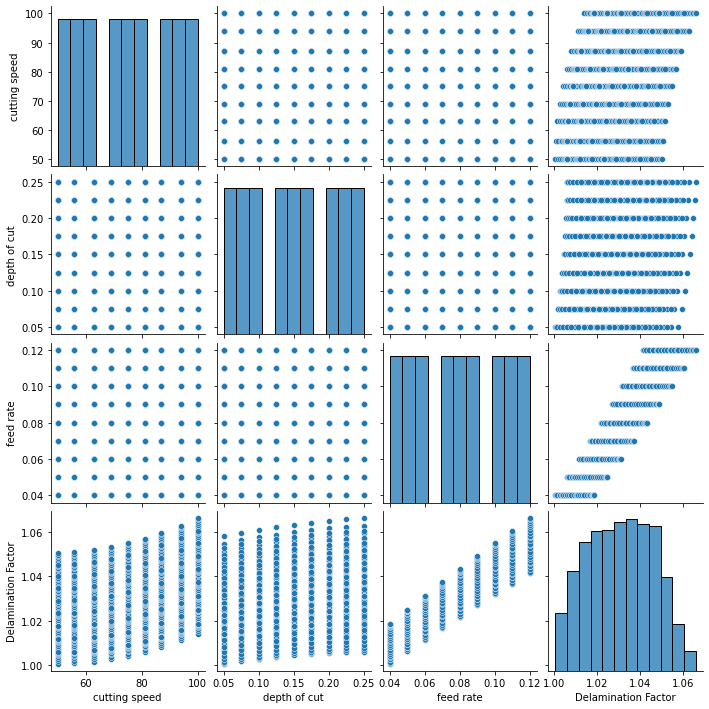

In [5]:
sns.pairplot(data)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delamination Factor', ylabel='Density'>

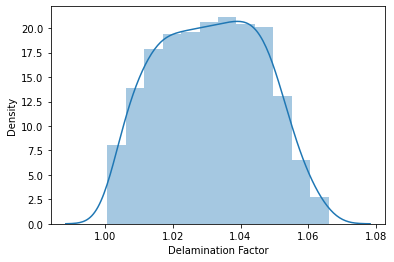

In [6]:
sns.distplot(data['Delamination Factor'])

<AxesSubplot:>

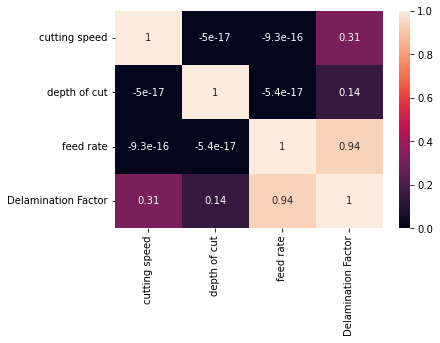

In [7]:
sns.heatmap(data.corr(), annot=True)

# Dataset Preparation

In [8]:
#define x and y
x=data.iloc[:, :-1]
y=data.iloc[:, 3]

In [9]:
x.shape

(729, 3)

In [10]:
y.shape

(729,)

In [11]:
y

0      1.000699
1      1.006140
2      1.011477
3      1.016711
4      1.021840
         ...   
724    1.043141
725    1.049016
726    1.054788
727    1.060455
728    1.066019
Name: Delamination Factor, Length: 729, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
X_train.shape

(510, 3)

In [14]:
y_train.shape

(510,)

In [15]:
X_test.shape

(219, 3)

In [16]:
y_test.shape

(219,)

# Model 1:Multiple Linear Regression

In [17]:
#from sklearn library imprtin linear regression
#fiting the training set into the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
#evaluate the modelintercept
print(lm.intercept_)

0.959844858830968


In [19]:
print(lm.coef_)

[2.96294018e-04 3.28255577e-02 5.50862226e-01]


In [20]:
#predicting the test set result
prediction1 = lm.predict(X_test)
prediction1

array([1.01326491, 1.02789205, 1.03643186, 1.03023908, 1.02277737,
       1.0331493 , 1.00490044, 1.00011309, 1.04277664, 1.00738395,
       1.0184012 , 1.05663422, 1.03795217, 1.01549098, 1.03852144,
       1.0276562 , 1.03998739, 1.03384898, 1.02403079, 1.00890427,
       1.032701  , 1.04772207, 1.0158028 , 1.04713729, 1.01097833,
       1.02914547, 1.01990599, 1.01814375, 1.04098336, 1.0255511 ,
       1.02941844, 1.04334591, 1.00325916, 1.01509704, 1.04385473,
       1.02117493, 1.04289761, 1.01277161, 1.00466459, 1.04465985,
       1.03574771, 1.04092899, 1.01953365, 1.01315003, 1.04320942,
       1.03396994, 1.05500846, 1.03201685, 1.01426088, 1.01258076,
       1.0209996 , 1.00808363, 1.03213781, 1.03295845, 1.02827047,
       1.05708252, 1.04221345, 1.05018399, 1.05035932, 1.01179897,
       1.06296348, 1.03934208, 1.01769545, 1.01894887, 1.00752044,
       1.05145293, 1.0040798 , 1.02180472, 1.03244355, 1.02447301,
       1.0251028 , 1.01725322, 1.00574268, 1.03949409, 1.01688

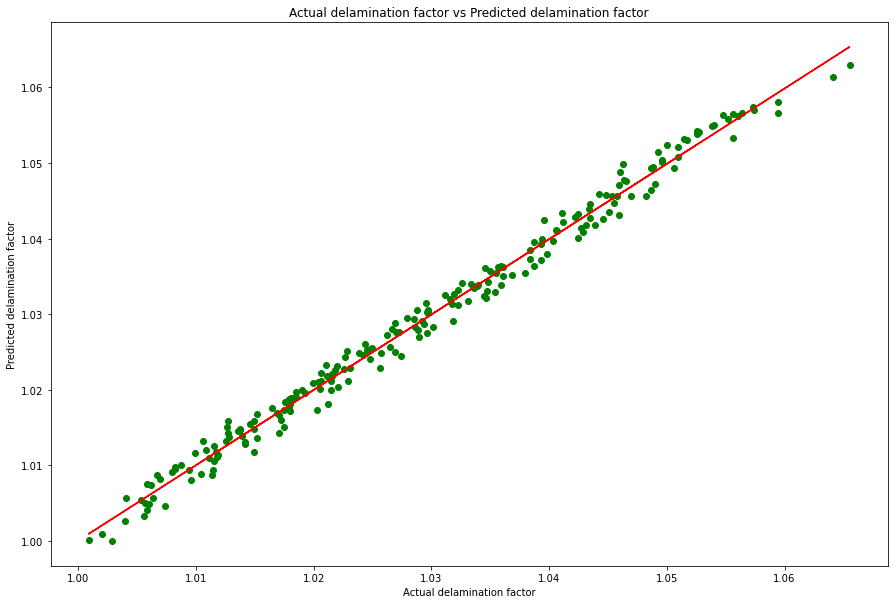

In [21]:
#to scatter the plots which evaluated
plt.figure(figsize=(15,10))
plt.plot(y_test,prediction1,'o',color='green')
m,b =np.polyfit(y_test,prediction1,1)
plt.plot(y_test,m*y_test+b,color='red',)
plt.xlabel('Actual delamination factor')
plt.ylabel('Predicted delamination factor')
plt.title('Actual delamination factor vs Predicted delamination factor')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delamination Factor', ylabel='Density'>

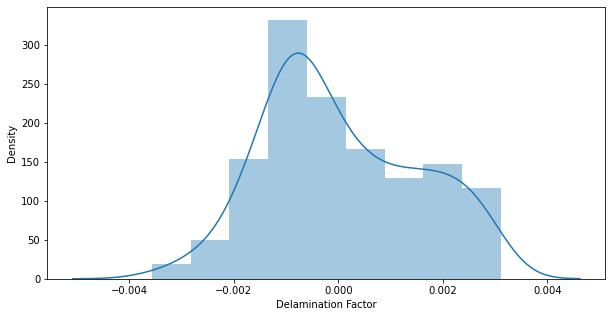

In [22]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- prediction1)
sns.distplot(residuals)

In [23]:
#compare actual output values with predicted values
pred_y_df=pd.DataFrame({'Actual delamination factor':y_test,'Predicted delamination factor':prediction1,'difference':y_test-prediction1})
pred_y_df[0:]

,Actual delamination factor,Predicted delamination factor,difference
468,1.010562,1.013265,-0.002703
148,1.028898,1.027892,0.001006
302,1.035888,1.036432,-0.000543
355,1.029603,1.030239,-0.000636
515,1.022615,1.022777,-0.000162
...,...,...,...
332,1.046240,1.049812,-0.003571
532,1.018102,1.018910,-0.000808
558,1.012736,1.015863,-0.003128
137,1.017245,1.016054,0.001191


In [24]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, prediction1))  
print('MSE:', metrics.mean_squared_error(y_test, prediction1))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))
print('R2 Score:',metrics.explained_variance_score(y_test,prediction1))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,prediction1)*100))

MAE: 0.001235212825086487
MSE: 2.1898638839887856e-06
RMSE: 0.0014798188686419651
R2 Score: 0.9905532400847042
Variance score: 99.06


# Model 2:Ridge Regression

In [25]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

In [26]:
# Train the model
ridgeR = Ridge(alpha = 0.01)
ridgeR.fit(X_train, y_train)

Ridge(alpha=0.01)

In [27]:
#evaluate the modelintercept
print(ridgeR.intercept_)

0.9612101356225937


In [28]:
#predict the test results
y_rdpred = ridgeR.predict(X_test)
y_rdpred

array([1.01389343, 1.02790977, 1.03628722, 1.0302624 , 1.02310647,
       1.03302475, 1.00554756, 1.0007958 , 1.04233201, 1.00804215,
       1.01874447, 1.05615104, 1.03765451, 1.01598212, 1.03823395,
       1.0275516 , 1.03983361, 1.03357642, 1.02435957, 1.00940944,
       1.03270926, 1.04727345, 1.01615565, 1.04681601, 1.01147816,
       1.02916287, 1.02023375, 1.01833856, 1.04068081, 1.02572686,
       1.02944678, 1.04291145, 1.00391632, 1.01543426, 1.04355353,
       1.02136486, 1.04259596, 1.01312936, 1.00518939, 1.04449114,
       1.03561356, 1.04091318, 1.01973362, 1.01379921, 1.04276949,
       1.03384037, 1.0543978 , 1.03203559, 1.01474063, 1.01321977,
       1.02133328, 1.00859382, 1.03229954, 1.03311516, 1.02857962,
       1.05646653, 1.04192229, 1.04972031, 1.04975189, 1.01229378,
       1.06231781, 1.03904957, 1.01802307, 1.01927618, 1.0081841 ,
       1.05085142, 1.00473194, 1.02227089, 1.03230335, 1.02450534,
       1.02541137, 1.0178773 , 1.00641091, 1.03906953, 1.01737

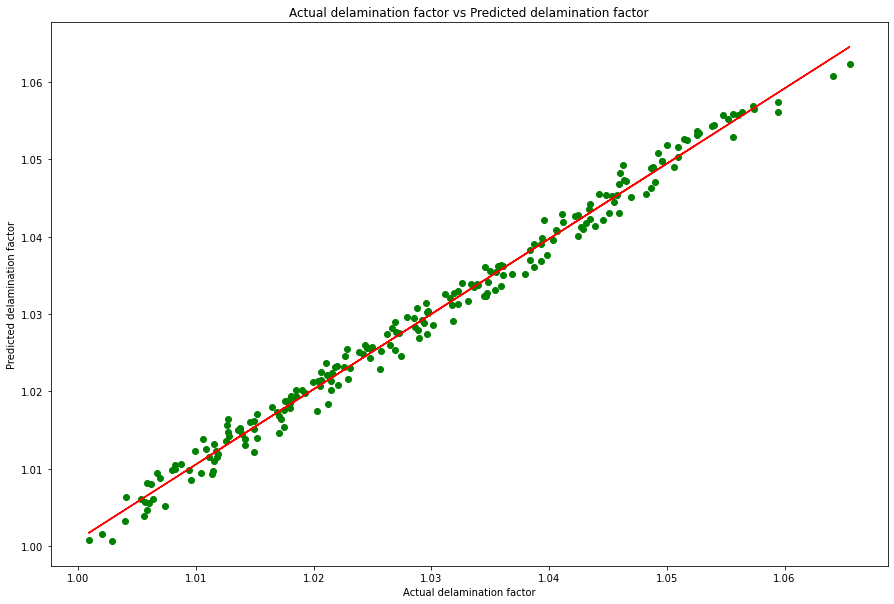

In [29]:
#to scatter the plots which evaluated
plt.figure(figsize=(15,10))
plt.plot(y_test,y_rdpred,'o',color='green')
m,b =np.polyfit(y_test,y_rdpred,1)
plt.plot(y_test,m*y_test+b,color='red',)
plt.xlabel('Actual delamination factor')
plt.ylabel('Predicted delamination factor')
plt.title('Actual delamination factor vs Predicted delamination factor')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delamination Factor', ylabel='Density'>

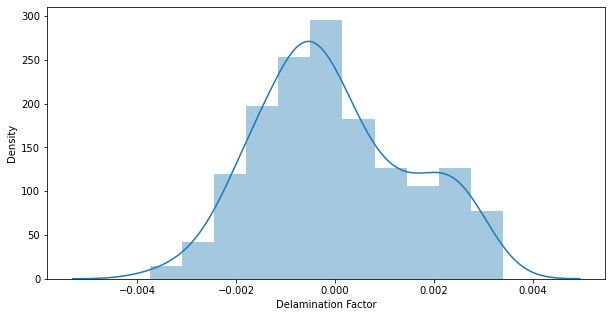

In [30]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_rdpred)
sns.distplot(residuals)

In [31]:
#compare actual output values with predicted values
pred_y_df=pd.DataFrame({'Actual delamination factor':y_test,'Predicted delamination factor':y_rdpred,'difference':y_test-y_rdpred})
pred_y_df[0:]

,Actual delamination factor,Predicted delamination factor,difference
468,1.010562,1.013893,-0.003331
148,1.028898,1.027910,0.000988
302,1.035888,1.036287,-0.000399
355,1.029603,1.030262,-0.000660
515,1.022615,1.023106,-0.000491
...,...,...,...
332,1.046240,1.049220,-0.002980
532,1.018102,1.019387,-0.001284
558,1.012736,1.016482,-0.003746
137,1.017245,1.016392,0.000853


In [32]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_rdpred))  
print('MSE:', metrics.mean_squared_error(y_test, y_rdpred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_rdpred)))
print('R2 Score:',metrics.explained_variance_score(y_test,y_rdpred))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_rdpred)*100))

MAE: 0.0012423898771182324
MSE: 2.3108315565752862e-06
RMSE: 0.0015201419527712818
R2 Score: 0.9900220503349842
Variance score: 99.00


# Model 3:Decision Tree Regression Model

In [33]:
# import DecisionTree RGRESSOR from sklearn libraery
from sklearn.tree import DecisionTreeRegressor  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 42)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [34]:
y_DTRpred=regressor.predict(X_test)
y_DTRpred

array([1.0103322 , 1.02860946, 1.0364289 , 1.02803431, 1.02169343,
       1.03387747, 1.00610563, 1.00069851, 1.04431989, 1.00517426,
       1.01850376, 1.06001419, 1.0402155 , 1.01534301, 1.03734795,
       1.0268658 , 1.03876836, 1.03635107, 1.02376865, 1.01020997,
       1.03237189, 1.04498158, 1.01370583, 1.04551097, 1.01020997,
       1.02972522, 1.01939391, 1.02199939, 1.04006517, 1.02410519,
       1.02733168, 1.04285797, 1.00597039, 1.01764219, 1.04233647,
       1.02233339, 1.04292633, 1.0139219 , 1.00613993, 1.04502046,
       1.03596705, 1.04188776, 1.0204017 , 1.0152043 , 1.04138696,
       1.03436421, 1.05813781, 1.03051013, 1.01252004, 1.0120845 ,
       1.01943081, 1.00941405, 1.03366815, 1.03607937, 1.02956802,
       1.05867741, 1.03986287, 1.0503428 , 1.05048542, 1.01103055,
       1.064875  , 1.04006517, 1.01771012, 1.01859351, 1.00696711,
       1.04782545, 1.00597039, 1.02113283, 1.03403419, 1.02659474,
       1.02228369, 1.01754541, 1.00262773, 1.03818617, 1.01802

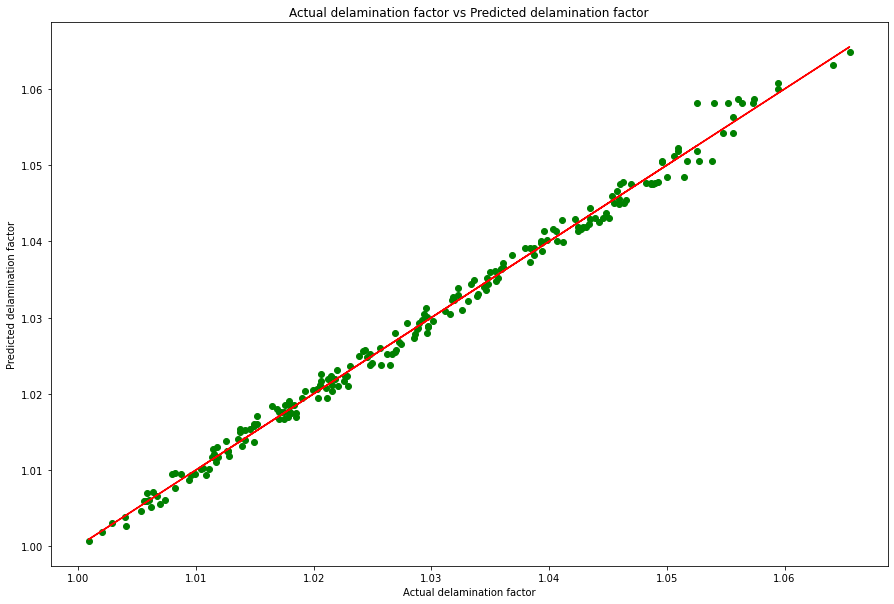

In [35]:
#to scatter the plots which evaluated
plt.figure(figsize=(15,10))
plt.plot(y_test,y_DTRpred,'o',color='green')
m,b =np.polyfit(y_test,y_DTRpred,1)
plt.plot(y_test,m*y_test+b,color='red',)
plt.xlabel('Actual delamination factor')
plt.ylabel('Predicted delamination factor')
plt.title('Actual delamination factor vs Predicted delamination factor')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delamination Factor', ylabel='Density'>

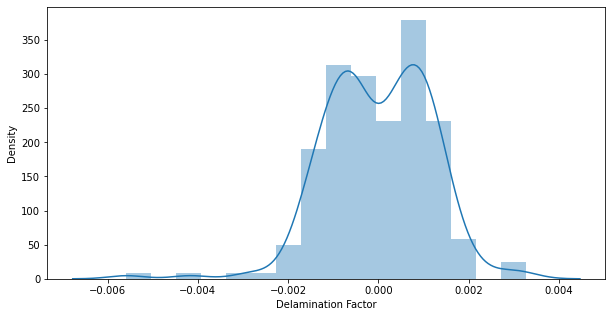

In [36]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_DTRpred)
sns.distplot(residuals)

In [37]:
#compare actual output values with predicted values
pred_y_df=pd.DataFrame({'Actual delamination factor':y_test,'Predicted delamination factor':y_DTRpred,'difference':y_test-y_DTRpred})
pred_y_df[0:]

,Actual delamination factor,Predicted delamination factor,difference
468,1.010562,1.010332,0.000230
148,1.028898,1.028609,0.000289
302,1.035888,1.036429,-0.000541
355,1.029603,1.028034,0.001568
515,1.022615,1.021693,0.000922
...,...,...,...
332,1.046240,1.047825,-0.001585
532,1.018102,1.017533,0.000570
558,1.012736,1.012449,0.000286
137,1.017245,1.017642,-0.000397


In [38]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_DTRpred))  
print('MSE:', metrics.mean_squared_error(y_test, y_DTRpred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_DTRpred)))
print('R2 Score:',metrics.explained_variance_score(y_test,y_DTRpred))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_DTRpred)*100))

MAE: 0.0009503888447488588
MSE: 1.3575759582489531e-06
RMSE: 0.0011651506161217756
R2 Score: 0.9941377032989308
Variance score: 99.41


In [39]:
#checking the predictions
regressor.predict([[100,0.150,0.04]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1.01754541])

# Model 4:Random Forest Regression Model

In [40]:
#importing random forest regression
from sklearn.ensemble import RandomForestRegressor
lr=RandomForestRegressor(n_estimators = 500, random_state = 42)
lr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [41]:
#predict the test results
y_RFRpred=lr.predict(X_test)
y_RFRpred

array([1.01047872, 1.0287806 , 1.03608311, 1.02890459, 1.02213295,
       1.03230199, 1.00587093, 1.00129321, 1.04384204, 1.00597273,
       1.01806258, 1.05919449, 1.03993334, 1.01458997, 1.03809012,
       1.02796314, 1.03934692, 1.03648063, 1.02534384, 1.01065718,
       1.03197763, 1.04523156, 1.01447281, 1.04509095, 1.0113275 ,
       1.02931417, 1.01915373, 1.02206122, 1.04045303, 1.02477569,
       1.02787019, 1.04188039, 1.0057811 , 1.01777486, 1.0427225 ,
       1.02181091, 1.04204031, 1.01434222, 1.00767366, 1.0451897 ,
       1.03482138, 1.04126511, 1.01992895, 1.01482081, 1.0425381 ,
       1.0333327 , 1.05388184, 1.03080322, 1.01260559, 1.01126952,
       1.01943953, 1.00959535, 1.03322082, 1.03516933, 1.02967304,
       1.05850948, 1.04026097, 1.04992541, 1.04933829, 1.01181373,
       1.06440962, 1.03880076, 1.01784501, 1.01859727, 1.00706428,
       1.04780049, 1.00583469, 1.02139508, 1.0343244 , 1.02738053,
       1.02213046, 1.0175495 , 1.0045852 , 1.03888616, 1.01790

# Sample check

In [42]:
CHECK_y_RFRpred=lr.predict([[100,0.225,0.04]])
CHECK_y_RFRpred

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.01841776])

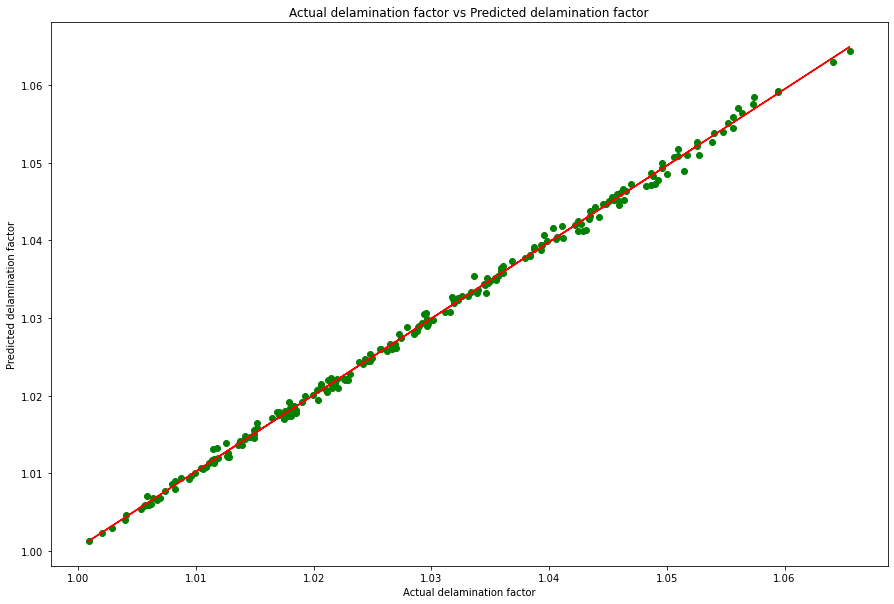

In [43]:
#to scatter the plots which evaluated
plt.figure(figsize=(15,10))
plt.plot(y_test,y_RFRpred,'o',color='green')
m,b =np.polyfit(y_test,y_RFRpred,1)
plt.plot(y_test,m*y_test+b,color='red',)
plt.xlabel('Actual delamination factor')
plt.ylabel('Predicted delamination factor')
plt.title('Actual delamination factor vs Predicted delamination factor')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delamination Factor', ylabel='Density'>

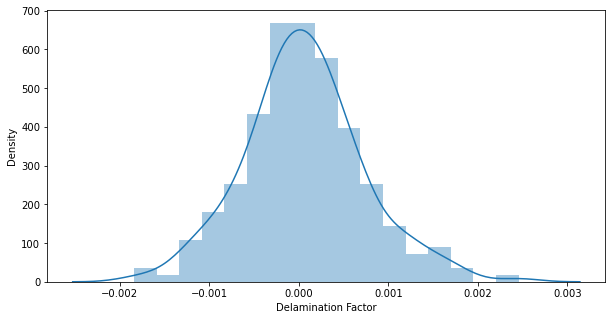

In [44]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_RFRpred)
sns.distplot(residuals)

In [45]:
#compare actual output values with predicted values
pred_y_df=pd.DataFrame({'Actual delamination factor':y_test,'Predicted delamination factor':y_RFRpred,'difference':y_test-y_RFRpred})
pred_y_df[0:]

,Actual delamination factor,Predicted delamination factor,difference
468,1.010562,1.010479,0.000083
148,1.028898,1.028781,0.000117
302,1.035888,1.036083,-0.000195
355,1.029603,1.028905,0.000698
515,1.022615,1.022133,0.000483
...,...,...,...
332,1.046240,1.046572,-0.000332
532,1.018102,1.017365,0.000737
558,1.012736,1.012112,0.000624
137,1.017245,1.017588,-0.000343


In [46]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_RFRpred))  
print('MSE:', metrics.mean_squared_error(y_test, y_RFRpred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_RFRpred)))
print('R2 Score:',metrics.explained_variance_score(y_test,y_RFRpred))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_RFRpred)*100))

MAE: 0.0005093465401288499
MSE: 4.5032032153759024e-07
RMSE: 0.0006710591043548923
R2 Score: 0.9980715042130829
Variance score: 99.81


In [47]:
#checking the predictions
lr.predict([[100,0.150,0.04]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.01735055])

# Model 5:KNN Regression Model

In [48]:
#importing Knn regression
from sklearn.neighbors import KNeighborsRegressor

In [49]:
# Build the KNN regression model
k = 5  # number of neighbors
model = KNeighborsRegressor(n_neighbors=k)

In [50]:
# Train the model
model.fit(X_train, y_train)

KNeighborsRegressor()

In [51]:
y_KNNpred = model.predict(X_test)
y_KNNpred

array([1.01415381, 1.02886678, 1.0379826 , 1.02987564, 1.02022439,
       1.0355154 , 1.01756371, 1.01697244, 1.04405777, 1.01655833,
       1.02229897, 1.05837078, 1.03720335, 1.01904798, 1.03808675,
       1.02879268, 1.03943011, 1.03882758, 1.02126222, 1.01073478,
       1.03290135, 1.0421288 , 1.01460646, 1.04902332, 1.01425465,
       1.03044771, 1.01674597, 1.01821208, 1.04044942, 1.02711272,
       1.02950498, 1.03772854, 1.01335918, 1.01860563, 1.04090859,
       1.02114103, 1.04191379, 1.01384867, 1.00946568, 1.0454718 ,
       1.03594129, 1.03920448, 1.01806121, 1.02265627, 1.04033143,
       1.03347329, 1.04484945, 1.03366416, 1.01842998, 1.01614689,
       1.0225338 , 1.01061301, 1.03665671, 1.03545058, 1.03246081,
       1.0505894 , 1.03923451, 1.04661563, 1.04544117, 1.01269996,
       1.06115335, 1.03919507, 1.01773766, 1.01830199, 1.01418538,
       1.04516343, 1.01740653, 1.02509576, 1.03080847, 1.02517704,
       1.02257894, 1.02164343, 1.01987223, 1.03665318, 1.02072

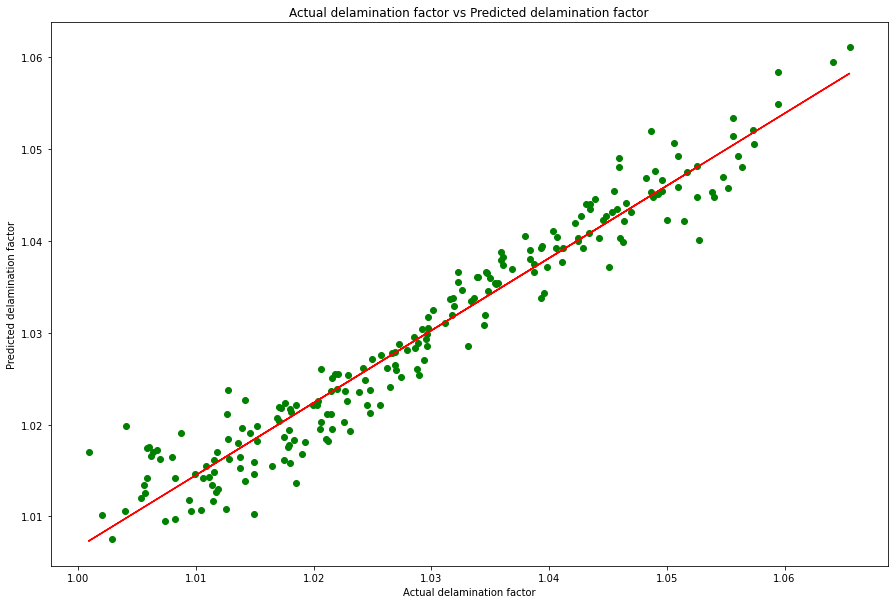

In [52]:
#to scatter the plots which evaluated
plt.figure(figsize=(15,10))
plt.plot(y_test,y_KNNpred,'o',color='green')
m,b =np.polyfit(y_test,y_KNNpred,1)
plt.plot(y_test,m*y_test+b,color='red',)
plt.xlabel('Actual delamination factor')
plt.ylabel('Predicted delamination factor')
plt.title('Actual delamination factor vs Predicted delamination factor')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delamination Factor', ylabel='Density'>

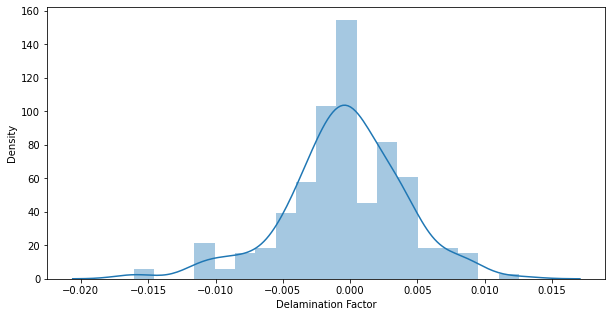

In [53]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_KNNpred)
sns.distplot(residuals)

In [54]:
#compare actual output values with predicted values
pred_y_df=pd.DataFrame({'Actual delamination factor':y_test,'Predicted delamination factor':y_KNNpred,'difference':y_test-y_KNNpred})
pred_y_df[0:]

,Actual delamination factor,Predicted delamination factor,difference
468,1.010562,1.014154,-0.003592
148,1.028898,1.028867,0.000031
302,1.035888,1.037983,-0.002094
355,1.029603,1.029876,-0.000273
515,1.022615,1.020224,0.002391
...,...,...,...
332,1.046240,1.039905,0.006335
532,1.018102,1.021370,-0.003268
558,1.012736,1.023710,-0.010974
137,1.017245,1.021784,-0.004539


In [55]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_KNNpred))  
print('MSE:', metrics.mean_squared_error(y_test, y_KNNpred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_KNNpred)))
print('R2 score:',metrics.explained_variance_score(y_test,y_KNNpred))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_KNNpred)*100))

MAE: 0.003261082491324207
MSE: 1.9728130735581518e-05
RMSE: 0.004441636042674086
R2 score: 0.9156192496220092
Variance score: 91.56


In [56]:
#checking the predictions
model.predict([[63,0.150,0.11]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([1.04143052])

# Model 6:Lasso Regression Model

In [57]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso

In [58]:
# Train the model
lassoR = Lasso(alpha=0.0001)
lassoR.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [59]:
# making a prediction
prediction6 = lassoR.predict(X_test)
prediction6 

array([1.01766963, 1.02639406, 1.0339613 , 1.03102967, 1.02652168,
       1.03305778, 1.00885799, 1.00880015, 1.03795187, 1.01479103,
       1.02279741, 1.05100519, 1.03287712, 1.0207693 , 1.03576353,
       1.0288161 , 1.03745969, 1.03174773, 1.02833653, 1.01370686,
       1.03170731, 1.04456255, 1.02082234, 1.04191464, 1.01574759,
       1.02820891, 1.02195173, 1.01996404, 1.03644117, 1.02725236,
       1.03080379, 1.04083828, 1.00840623, 1.01663849, 1.04101112,
       1.02352809, 1.0394878 , 1.01725829, 1.01128003, 1.04147549,
       1.03503286, 1.0392215 , 1.02307633, 1.02162759, 1.03954084,
       1.03328366, 1.05031494, 1.03277886, 1.01665111, 1.01874119,
       1.02477249, 1.01348098, 1.0343148 , 1.03454068, 1.03076337,
       1.05235566, 1.04055936, 1.04524019, 1.04399579, 1.01597347,
       1.05523426, 1.03598941, 1.01861357, 1.02042842, 1.01608847,
       1.04681654, 1.00863211, 1.02523686, 1.02887394, 1.02419311,
       1.02590188, 1.02275699, 1.01433928, 1.03704835, 1.02388

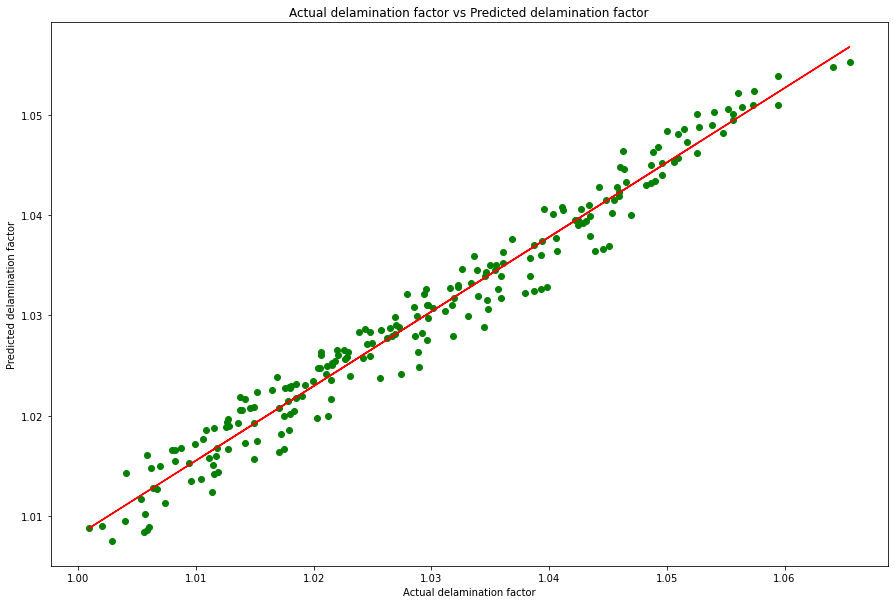

In [60]:
#to scatter the plots which evaluated
plt.figure(figsize=(15,10))
plt.plot(y_test,prediction6,'o',color='green')
m,b =np.polyfit(y_test,prediction6,1)
plt.plot(y_test,m*y_test+b,color='red',)
plt.xlabel('Actual delamination factor')
plt.ylabel('Predicted delamination factor')
plt.title('Actual delamination factor vs Predicted delamination factor')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delamination Factor', ylabel='Density'>

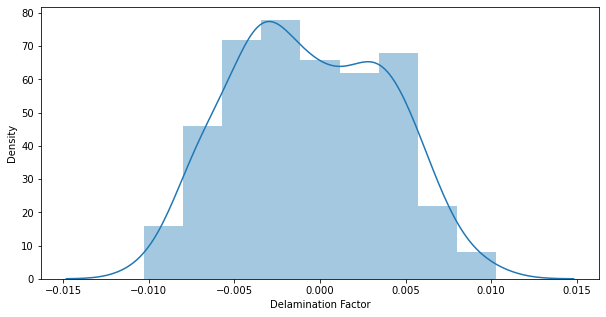

In [61]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- prediction6)
sns.distplot(residuals)

In [62]:
#compare actual output values with predicted values
pred_y_df=pd.DataFrame({'Actual delamination factor':y_test,'Predicted delamination factor':prediction6,'difference':y_test-prediction6})
pred_y_df[0:]

,Actual delamination factor,Predicted delamination factor,difference
468,1.010562,1.017670,-0.007108
148,1.028898,1.026394,0.002504
302,1.035888,1.033961,0.001927
355,1.029603,1.031030,-0.001427
515,1.022615,1.026522,-0.003906
...,...,...,...
332,1.046240,1.046365,-0.000125
532,1.018102,1.022970,-0.004868
558,1.012736,1.019645,-0.006909
137,1.017245,1.018162,-0.000917


In [63]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,prediction6))  
print('MSE:', metrics.mean_squared_error(y_test, prediction6))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction6)))
print('R2 score:',metrics.explained_variance_score(y_test,prediction6))
print('Variance Score: {:.2f}'.format(metrics.explained_variance_score(y_test,prediction6)*100))

MAE: 0.0037998623419511234
MSE: 1.992732450477486e-05
RMSE: 0.004464003192737978
R2 score: 0.9155274175863483
Variance Score: 91.55


# Tabulating the accuracies of different models

In [64]:
# create a list of model names
model_names = ["Multiple Linear Regression","Ridge Regression","Decision Tree Regression","Random Forest Regression" ,"K-Nearest Neighbors",'Lasso Regression']

# create a list of accuracy scores for each model
MAE=[0.001235212825086487,0.0012423898771182324,0.0009503888447488588,0.0005093465401288499,0.003261082491324207,0.0037998623419511234]
MSE=[2.1898638839887856e-06,2.3108315565752862e-06,1.3575759582489531e-06,4.5032032153759024e-07,1.9728130735581518e-05,1.992732450477486e-05]
RMSE=[0.0014798188686419651,0.0015201419527712818,0.0011651506161217756,0.0006710591043548923,0.004441636042674086,0.004464003192737978]
R2Score=[0.9905532400847042,0.9900220503349842,0.9941377032989308,0.9980715042130829,0.9156192496220092,0.9155274175863483]

# create a dictionary to store the model names and accuracy scores
data = {"Model": model_names,'Mean Absolute Error':MAE,"Mean Square Error":MSE,"Root Mean Square Error":RMSE,"R2 Score":R2Score}

# create a pandas DataFrame using the dictionary
accuracy_df = pd.DataFrame(data)

# display the DataFrame
accuracy_df

,Model,Mean Absolute Error,Mean Square Error,Root Mean Square Error,R2 Score
0,Multiple Linear Regression,0.001235,2.189864e-06,0.001480,0.990553
1,Ridge Regression,0.001242,2.310832e-06,0.001520,0.990022
2,Decision Tree Regression,0.000950,1.357576e-06,0.001165,0.994138
3,Random Forest Regression,0.000509,4.503203e-07,0.000671,0.998072
4,K-Nearest Neighbors,0.003261,1.972813e-05,0.004442,0.915619
5,Lasso Regression,0.003800,1.992732e-05,0.004464,0.915527


# Arranging the accuracies in descending order

In [65]:
accuracy_df=accuracy_df.sort_values('Mean Absolute Error',ascending=False)
accuracy_df

,Model,Mean Absolute Error,Mean Square Error,Root Mean Square Error,R2 Score
5,Lasso Regression,0.003800,1.992732e-05,0.004464,0.915527
4,K-Nearest Neighbors,0.003261,1.972813e-05,0.004442,0.915619
1,Ridge Regression,0.001242,2.310832e-06,0.001520,0.990022
0,Multiple Linear Regression,0.001235,2.189864e-06,0.001480,0.990553
2,Decision Tree Regression,0.000950,1.357576e-06,0.001165,0.994138
3,Random Forest Regression,0.000509,4.503203e-07,0.000671,0.998072


In [66]:
accuracy_df=accuracy_df.sort_values('Mean Square Error',ascending=False)
accuracy_df

,Model,Mean Absolute Error,Mean Square Error,Root Mean Square Error,R2 Score
5,Lasso Regression,0.003800,1.992732e-05,0.004464,0.915527
4,K-Nearest Neighbors,0.003261,1.972813e-05,0.004442,0.915619
1,Ridge Regression,0.001242,2.310832e-06,0.001520,0.990022
0,Multiple Linear Regression,0.001235,2.189864e-06,0.001480,0.990553
2,Decision Tree Regression,0.000950,1.357576e-06,0.001165,0.994138
3,Random Forest Regression,0.000509,4.503203e-07,0.000671,0.998072


In [67]:
accuracy_df=accuracy_df.sort_values('Root Mean Square Error',ascending=False)
accuracy_df

,Model,Mean Absolute Error,Mean Square Error,Root Mean Square Error,R2 Score
5,Lasso Regression,0.003800,1.992732e-05,0.004464,0.915527
4,K-Nearest Neighbors,0.003261,1.972813e-05,0.004442,0.915619
1,Ridge Regression,0.001242,2.310832e-06,0.001520,0.990022
0,Multiple Linear Regression,0.001235,2.189864e-06,0.001480,0.990553
2,Decision Tree Regression,0.000950,1.357576e-06,0.001165,0.994138
3,Random Forest Regression,0.000509,4.503203e-07,0.000671,0.998072


In [68]:
accuracy_df=accuracy_df.sort_values('R2 Score',ascending=False)
accuracy_df

,Model,Mean Absolute Error,Mean Square Error,Root Mean Square Error,R2 Score
3,Random Forest Regression,0.000509,4.503203e-07,0.000671,0.998072
2,Decision Tree Regression,0.000950,1.357576e-06,0.001165,0.994138
0,Multiple Linear Regression,0.001235,2.189864e-06,0.001480,0.990553
1,Ridge Regression,0.001242,2.310832e-06,0.001520,0.990022
4,K-Nearest Neighbors,0.003261,1.972813e-05,0.004442,0.915619
5,Lasso Regression,0.003800,1.992732e-05,0.004464,0.915527
